# Project 6 Capstone - Part 2: Dataset Munging and Cleaning: Food Deserts

---

In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
# Data Source: 
# Name: Food Deserts data for the United States
# Link: https://data.world/smartcolumbusos/978eac18-d4d0-4e36-8d1d-23aadd86a702/workspace/file?filename=food-deserts-data-for-the-usa-csv-1.csv
# Description: This dataset identifies the food deserts in the U.S., which includes the regions with low/limited access to food base don resident income levels and transportation availability.
# Data Dictionary: https://data.world/smartcolumbusos/978eac18-d4d0-4e36-8d1d-23aadd86a702/workspace/file?filename=data-dictionary-food-deserts-csv-2.csv
# (Also saved in Data Folder/Food_Deserts)

In [7]:
# Article - "Rising food insecurity in Alabama reflects national trends"
# Source: https://www.alreporter.com/2024/09/11/report-rising-food-insecurity-in-alabama-reflects-national-trends/
# "In Alabama, food insecurity rates mirror national averages, with an estimated 14 percent of households facing food insecurity."
# Alabama is a microcosm of america in terms of food insecurity

In [8]:
df = pd.read_csv('../data/Food_Deserts/food-deserts-data-for-the-usa-csv-1.csv')

In [9]:
df.shape

(1000, 147)

In [10]:
df.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(102), int64(43), object(2)
memory usage: 1.1+ MB


In [12]:
df.isna().sum()

CensusTract      0
State            0
County           0
Urban            0
POP2010          0
                ..
TractAIAN        0
TractOMultir     0
TractHispanic    0
TractHUNV        0
TractSNAP        0
Length: 147, dtype: int64

In [13]:
df.columns

Index(['CensusTract', 'State', 'County', 'Urban', 'POP2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       ...
       'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI',
       'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'],
      dtype='object', length=147)

In [14]:
#New dataframe with just the columns I need:
new_df = df[['County', 'POP2010','PovertyRate', 'MedianFamilyIncome']]

# Project Capstone Part 3: Preprocessing + EDA
---

In [16]:
new_df.shape

(1000, 4)

In [17]:
new_df.isna().sum()

County                0
POP2010               0
PovertyRate           0
MedianFamilyIncome    0
dtype: int64

In [18]:
new_df.head(20)

,County,POP2010,PovertyRate,MedianFamilyIncome
0,Autauga,1912,10.0,74750
1,Autauga,2170,18.2,51875
2,Autauga,3373,19.1,52905
3,Autauga,4386,3.3,68079
4,Autauga,10766,8.5,77819
5,Autauga,3668,14.1,67218
6,Autauga,2891,26.4,43646
7,Autauga,3081,13.6,74284
8,Autauga,10435,13.8,68713
9,Autauga,5675,12.8,52994


In [19]:
new_df.corr

<bound method DataFrame.corr of       County  POP2010  PovertyRate  MedianFamilyIncome
0    Autauga     1912         10.0               74750
1    Autauga     2170         18.2               51875
2    Autauga     3373         19.1               52905
3    Autauga     4386          3.3               68079
4    Autauga    10766          8.5               77819
..       ...      ...          ...                 ...
995  Russell     3110         24.8               39400
996  Russell     7031         23.7               39625
997  Russell     6946         13.0               66477
998  Russell     3727         18.4               55717
999  Russell     1873         27.1               42206

[1000 rows x 4 columns]>

In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   County              1000 non-null   object 
 1   POP2010             1000 non-null   int64  
 2   PovertyRate         1000 non-null   float64
 3   MedianFamilyIncome  1000 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [21]:
new_df.describe()

,POP2010,PovertyRate,MedianFamilyIncome
count,1000.000000,1000.000000,1000.000000
mean,4043.984000,21.572100,52341.870000
std,2017.888797,13.165046,22761.317521
min,0.000000,0.000000,0.000000
25%,2538.750000,12.400000,37923.250000
50%,3769.000000,19.200000,48719.000000
75%,5059.250000,28.225000,61424.250000
max,13166.000000,79.100000,156542.000000


In [22]:
#new_df.value_counts('State')

<Figure size 1200x600 with 0 Axes>

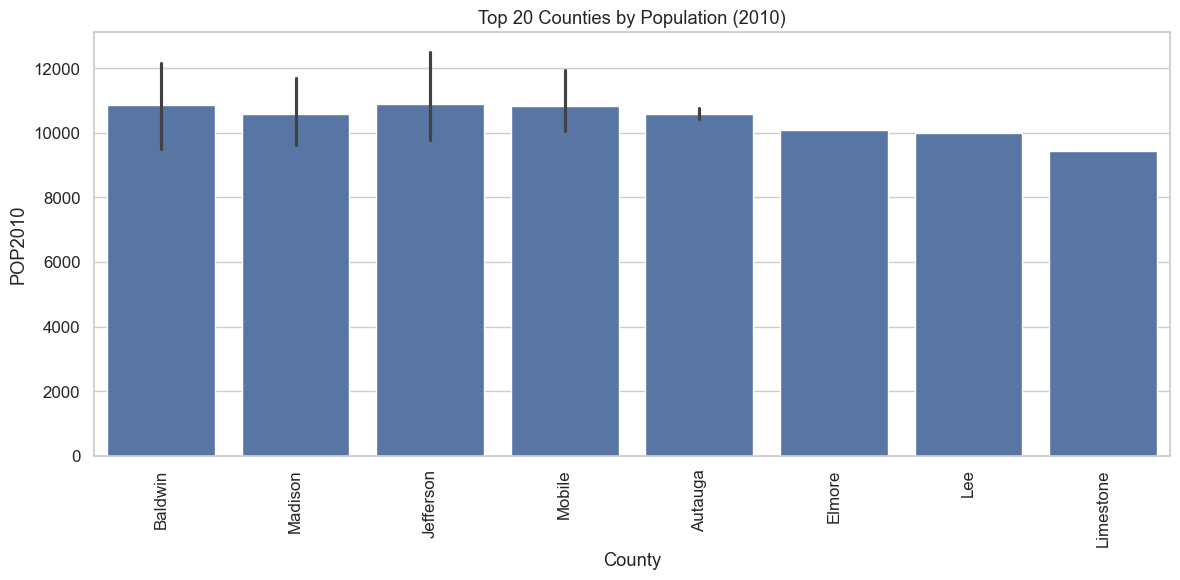

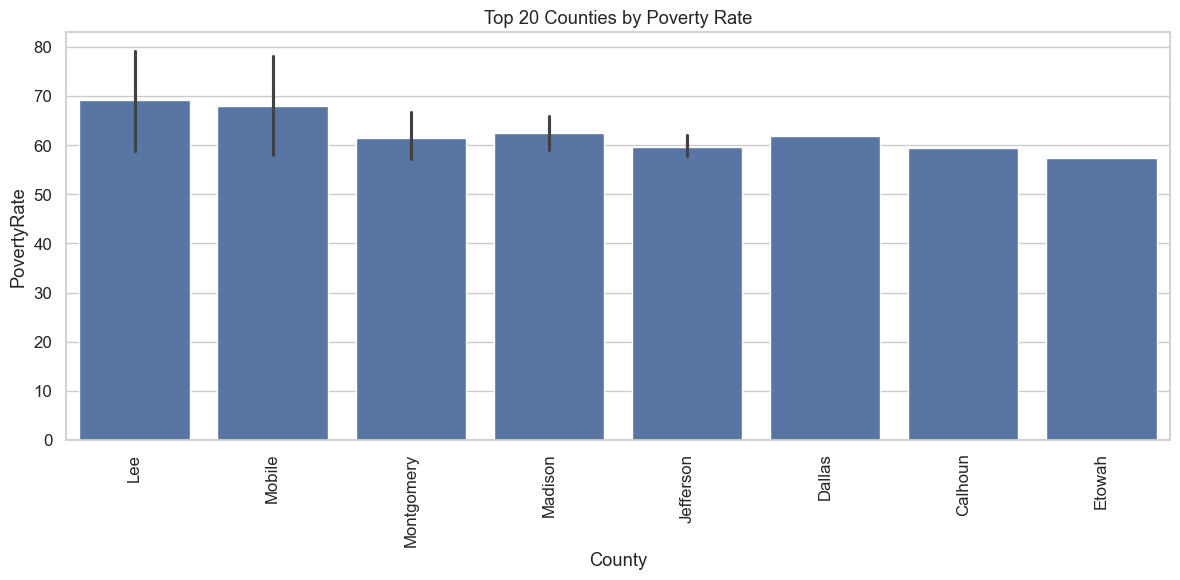

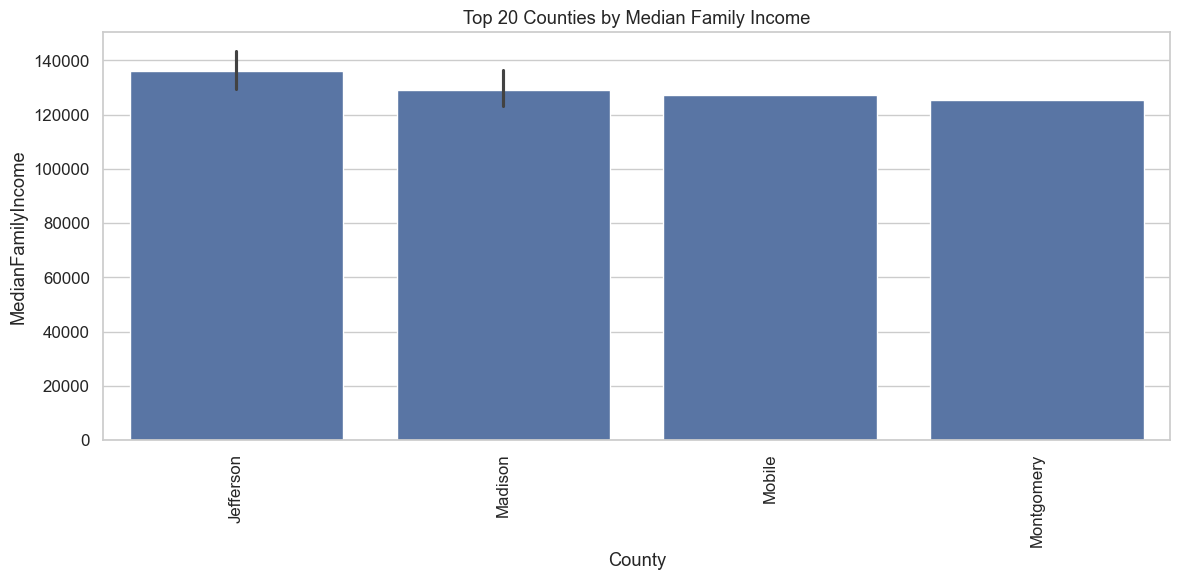

In [23]:
#Create plots
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12, 6))

# POP2010 vs County
plt.figure(figsize=(12, 6))
sns.barplot(x='County', y='POP2010', data=new_df.sort_values('POP2010', ascending=False).head(20))
plt.title('Top 20 Counties by Population (2010)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# PovertyRate vs County
plt.figure(figsize=(12, 6))
sns.barplot(x='County', y='PovertyRate', data=new_df.sort_values('PovertyRate', ascending=False).head(20))
plt.title('Top 20 Counties by Poverty Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# MedianFamilyIncome vs County
plt.figure(figsize=(12, 6))
sns.barplot(x='County', y='MedianFamilyIncome', data=new_df.sort_values('MedianFamilyIncome', ascending=False).head(20))
plt.title('Top 20 Counties by Median Family Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Modeling
---

In [61]:
#Modeling

In [26]:
X = new_df[['POP2010', 'MedianFamilyIncome']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


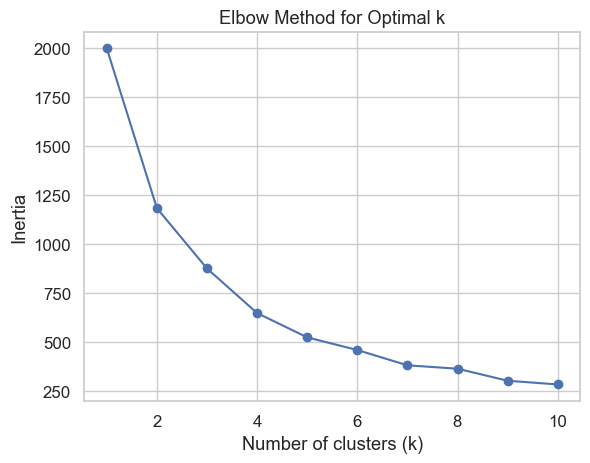

In [27]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [28]:
# optimal k is ?
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
new_df['Cluster'] = kmeans.fit_predict(X_scaled)


/var/folders/xt/hdlbn4j903v98px3bq4pf0jc0000gn/T/ipykernel_54447/1029570723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = kmeans.fit_predict(X_scaled)


In [29]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = new_df.groupby('Cluster').agg({
    'POP2010': 'mean',
    'MedianFamilyIncome': 'mean'
}).sort_values(by=['POP2010', 'MedianFamilyIncome'], ascending=False)

print(cluster_summary)


             POP2010  MedianFamilyIncome
Cluster                                 
3        7780.609023        65825.721805
2        4335.497619        51624.704762
1        3985.845238       102559.130952
0        2351.082645        36610.760331


In [30]:
# best cluster for business
best_cluster = cluster_summary.index[0]
best_counties = new_df[new_df['Cluster'] == best_cluster].sort_values(
    by=['POP2010', 'MedianFamilyIncome'], ascending=False
)

print("Top 3 Best Counties for Business:")
print(best_counties[['County', 'POP2010', 'MedianFamilyIncome']].head(3))


Top 3 Best Counties for Business:
        County  POP2010  MedianFamilyIncome
19     Baldwin    13166               88768
709    Madison    12621              124970
543  Jefferson    12502               98941
